# Goal: We will try to make this plot

![Quarterback Plot](qb_plot.png)

In [1]:
# pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

<span style="font-family: Calibri; font-size: 16px;"> 
 There are different ways one can obtain data. These include downloading a file and loading it (most common are csv files or comma separated values). Others include scraping the data or extracting elements from a webpage, and using packages that have the data obtained for you. <br> </br>

Today we will use a read html feature that pandas has built in for simplicity. We will also scrape off Football Reference since it is a simple static webpage. Fun fact: This is the first website I ever scraped off of and what I used to start learning python. Here is a link to the documentation for the read html function: https://pandas.pydata.org/docs/reference/api/pandas.read_html.html <br> </br>

Main thing it does is returns a list of dataframes by reading the table off a webpage.

</span>

In [2]:
qb_data = pd.read_html('https://www.pro-football-reference.com/years/2023/passing.htm')[0]
qb_data_playoffs = pd.read_html('https://www.pro-football-reference.com/years/2023/passing.htm')[1]

In [3]:
qb_data.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Awards'],
      dtype='object')

In [4]:
# First way to manipulate dataframes is via dropping columns and rows
# axis = 1: Column
# axis = 0: Row
qb_data.drop(['Rk', 'Awards'], axis = 1, inplace = True)
qb_data_playoffs.drop(['Rk', 'Awards'], axis = 1, inplace = True)
qb_data.drop(qb_data.index[-1], axis = 0, inplace = True)

In [5]:
# Second way is to merge. Link to documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

qb_data = pd.merge(qb_data, qb_data_playoffs, on = 'Player', how = 'left', suffixes=('', '_Playoffs'))

In [6]:
qb_data.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Age_Playoffs', 'Team_Playoffs', 'Pos_Playoffs',
       'G_Playoffs', 'GS_Playoffs', 'QBrec_Playoffs', 'Cmp_Playoffs',
       'Att_Playoffs', 'Cmp%_Playoffs', 'Yds_Playoffs', 'TD_Playoffs',
       'TD%_Playoffs', 'Int_Playoffs', 'Int%_Playoffs', '1D_Playoffs',
       'Succ%_Playoffs', 'Lng_Playoffs', 'Y/A_Playoffs', 'AY/A_Playoffs',
       'Y/C_Playoffs', 'Y/G_Playoffs', 'Rate_Playoffs', 'Sk_Playoffs',
       'Yds.1_Playoffs', 'Sk%_Playoffs', 'NY/A_Playoffs', 'ANY/A_Playoffs',
       '4QC_Playoffs', 'GWD_Playoffs'],
      dtype='object')

In [7]:
# Fourth is Filter
qb_data = qb_data[(qb_data['Pos'] == 'QB') & (qb_data['GS'] >= 10)] # QB who started in more than 10 regular season games


### Correlation between playoff wins and regular season passing yards? Let's take a look

In [8]:
# Copy warning. No need to worry about that. If you want, just do a .copy() at the end to get rid of the error
qb_data['Playoff_Wins'] = qb_data['QBrec_Playoffs'].str.split('-').str[0].astype(float).fillna(0)

Text(0.5, 1.0, 'Are Yards/Completion Indicative of Playoff Success?')

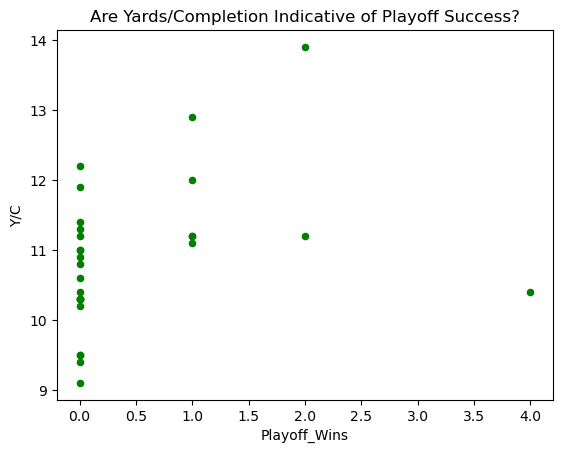

In [9]:
# Another handy feature in pandas is integration with matplotlib. 
# You can make plots directly from the dataframe. 
qb_data.plot(y='Y/C', x = 'Playoff_Wins', kind = 'scatter', color = 'green')
plt.title('Are Yards/Completion Indicative of Playoff Success?')

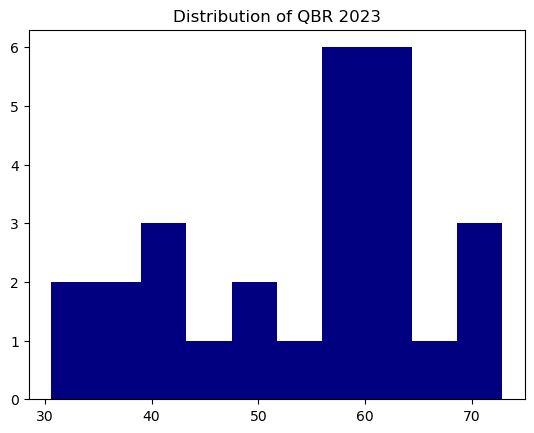

In [10]:
# Histogram directly from matplotlib
plt.hist(qb_data['QBR'], color='navy')
plt.title('Distribution of QBR 2023')
plt.show()

In [11]:
qb_data.sort_values(by='GWD', ascending=False)[['Player', 'Team', 'GWD']]

,Player,Team,GWD
15,Geno Smith,SEA,5.0
20,Desmond Ridder,ATL,4.0
13,Jalen Hurts,PHI,4.0
3,Josh Allen,BUF,4.0
18,Russell Wilson,DEN,4.0
2,Dak Prescott,DAL,3.0
27,Kenny Pickett,PIT,3.0
6,Jordan Love,GNB,3.0
7,C.J. Stroud,HOU,3.0
1,Jared Goff,DET,3.0


<span style="font-family: Calibri; font-size: 16px;"> Let's go back to that plot I mentioned above. There are two different ways that I'll go over. 
1. Loading it from a File (hint: You should download the QB-Links folder from GitHub)
2. Scraping the image directly from the website

This will depend on your comfort level. If you are comfortable with file directories but don't want to learn scraping then proceed below. If you want a little challenge, look further below to #2.
    
We will also need the following function below for both.
</span>

In [17]:
# pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup

def scrape_ids(url: str) -> list:
    """Function that scrapes the player ids off Football Reference"""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    a_tags_wanted = soup.select('td a')
    
    ids = []
    for item in a_tags_wanted:
        if 'players' in item['href']:
            id_ = item['href'].split('/')[3].split('.')[0]

        ids.append(id_)
        
    ids = list(dict.fromkeys(ids)) # Keep them in order
    
    return ids

# 1

In [12]:
# Images already there Way:
import os
    
folder_path = './QB-links'

img = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
    

In [13]:
links_df = pd.DataFrame(img, columns = ['player_link'])


links_df['Player_id'] = links_df['player_link'].str.split('/').str[-1].str.split('.').str[0]

In [18]:
url = 'https://www.pro-football-reference.com/years/2023/passing.htm'
ids = scrape_ids(url)

qb_data = pd.concat([qb_data, pd.DataFrame(ids, columns = ['Player_id'])], axis = 1).dropna(subset = 'Player')

In [19]:
qb_data = pd.merge(qb_data, links_df, on='Player_id', how = 'left')

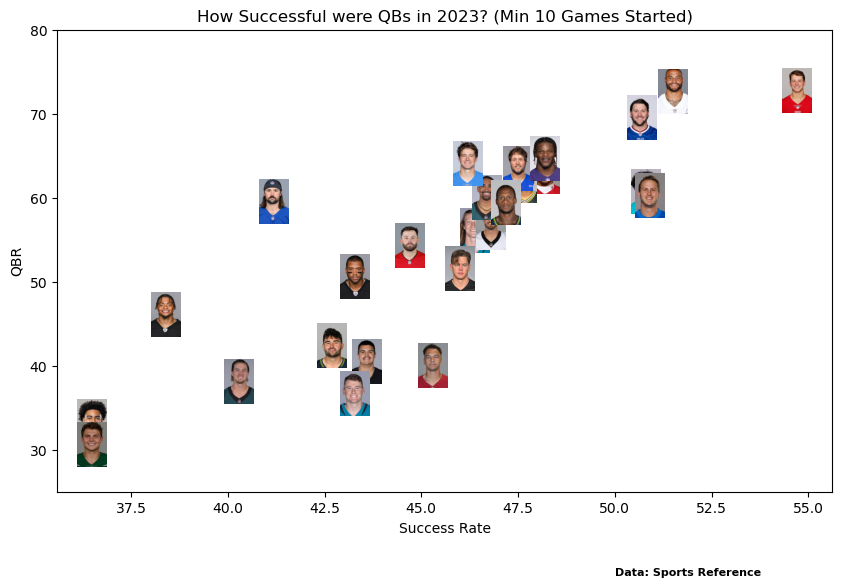

In [20]:
# pip install pillow
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(qb_data['Succ%'], qb_data['QBR'])

for i, row in qb_data.iterrows():

    img = Image.open(row['player_link'])

    annot = OffsetImage(img, zoom = 0.18, resample = True)

    annot = AnnotationBbox(annot, (row['Succ%'], row['QBR']), frameon = False)

    ax.add_artist(annot)
    

plt.xlabel('Success Rate')
plt.ylabel('QBR')
plt.title('How Successful were QBs in 2023? (Min 10 Games Started)')

plt.ylim(25, 80)

plt.text(50, 15, 'Data: Sports Reference', fontsize = 8, fontweight='bold', ha='left')

plt.show()



# 2

In [19]:
# Scraping Way
url = 'https://www.pro-football-reference.com/years/2023/passing.htm'
ids = scrape_ids(url)

qb_data = pd.concat([qb_data, pd.DataFrame(ids, columns = ['Player_id'])], axis = 1).dropna(subset = 'Player')

In [22]:
img_link = 'https://www.pro-football-reference.com/req/20230307/images/headshots/{}_2024.jpg'

qb_data['player_link'] = qb_data['Player_id'].apply(lambda x: img_link.format(x)) # Adding in links

In [23]:
# Hardcoding this:
urls_to_update = {
'https://www.pro-football-reference.com/req/20230307/images/headshots/AlleJo02_2024.jpg': 
    'https://www.pro-football-reference.com/req/20230307/images/headshots/AlleJo02_2023.jpg',
'https://www.pro-football-reference.com/req/20230307/images/headshots/MinsGa00_2024.jpg': 
    'https://www.pro-football-reference.com/req/20230307/images/headshots/MinsGa00_2023.jpg',
'https://www.pro-football-reference.com/req/20230307/images/headshots/WilsZa00_2024.jpg': 
    'https://www.pro-football-reference.com/req/20230307/images/headshots/WilsZa00_2023.jpg',
'https://www.pro-football-reference.com/req/20230307/images/headshots/OConAi00_2024.jpg': 
    'https://www.pro-football-reference.com/req/20230307/images/headshots/OConAi00_2023.jpg',
}

In [24]:
# Don't worry about this. This is a manual thing since some of the links only have 2023 headshots.
qb_data['player_link'] = qb_data['player_link'].replace(urls_to_update).fillna(qb_data['player_link'])

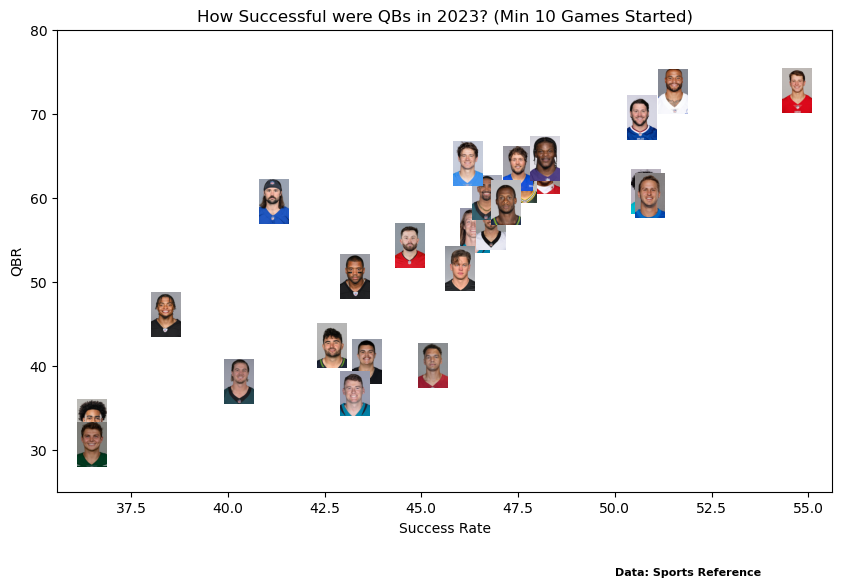

In [25]:
# pip install pillow
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(qb_data['Succ%'], qb_data['QBR'])

for i, row in qb_data.iterrows():

    response = requests.get(row['player_link'])
    img = Image.open(BytesIO(response.content))

    annot = OffsetImage(img, zoom = 0.18, resample = True)

    annot = AnnotationBbox(annot, (row['Succ%'], row['QBR']), frameon = False)

    ax.add_artist(annot)
    

plt.xlabel('Success Rate')
plt.ylabel('QBR')
plt.title('How Successful were QBs in 2023? (Min 10 Games Started)')

plt.ylim(25, 80)

plt.text(50, 15, 'Data: Sports Reference', fontsize = 8, fontweight='bold', ha='left')
plt.show()